In [16]:
# Parameters to set to run this notebook

# Initialize helpers.
import numpy as np
import project_path
from model.data_accessor import get_data_file_abs_path
from model.neuron_metadata import *
neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(get_data_file_abs_path('chem.json'))
N = neuron_metadata_collection.get_size()

# Constant current injections will be made to these neurons.
I_nA = 2
stimulus = {
  "PLMR": I_nA,
  "PLML": I_nA
}

# Neurons to plot membrane potentials for.
neurons_to_observe = NeuronMetadataCollection.create_lr_names_from_base([
  "AIY",
  "ALM",
  "ASE",
  "ASH",
  "ASK",
  "AWA",
  "AWB",
  "AWC",
  "ASK",
  "IL1",
  "IL2",
  "PLM",
  "RIV",
  "RMD"
  ])

# How many timesteps to run simulation for.
simul_time = 500

# Initial condition
# If you want a fixed-seed initial condition, uncomment the line below.
# np.random.seed(0)
init_conds = 10**(-4)*np.random.normal(0, 0.94, 2*N)

# Run the model

In [17]:
from model.neural_model import NeuralModel
from util.plot_util import *

model = NeuralModel(neuron_metadata_collection)
model.init_conds = init_conds

model.set_I_ext_constant_currents(stimulus)
model.init_kunert_2017_cook_connectome()
# model.init_kunert_2017()

# Uncomment if you want the default moving-Vth behavior
# model.keep_vth_static = True

# Uncomment this if you want to start at a standard equilibrium rather than a random initial condition.
"""
cur_I_ext = np.zeros(N)
neuron_id = neuron_metadata_collection.get_id_from_name("PLMR")
cur_I_ext[neuron_id] = I_nA * 10000
model.cur_I_ext = cur_I_ext
equi = model.compute_standard_equilibrium()
model.init_conds = equi
"""

(v_mat, s_mat, v_normalized_mat) = model.run(simul_time)

# The oscillatory dynamic doesn't stabilize until about dt*300 onwards.
# Also, interactome analysis is done after the first 50 timesteps.
truncated_potentials = v_normalized_mat[300:,:]

Timestep 0 out of 500
Timestep 100 out of 500
Timestep 200 out of 500
Timestep 300 out of 500
Timestep 400 out of 500
Total runtime = 1.08s


# Plot potentials of selected neurons

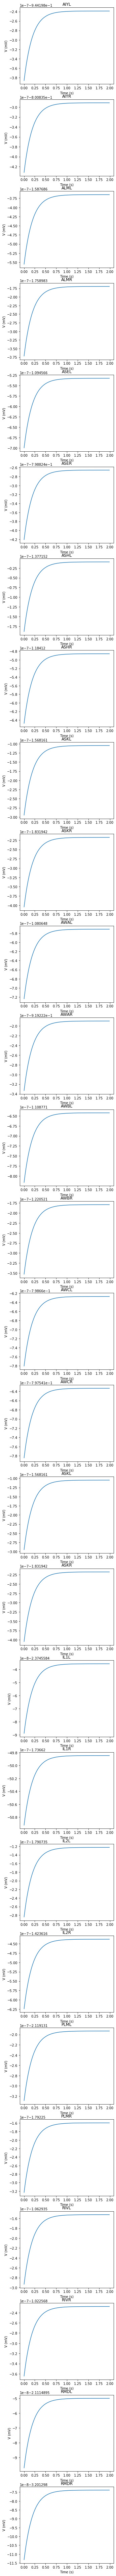

In [18]:
fig, axes = plt.subplots(nrows=len(neurons_to_observe), ncols=1, figsize=(5, 5*len(neurons_to_observe)))
plot_potentials(
  neuron_names_to_show = neurons_to_observe,
  dynamics = v_mat[300:,:],
  is_normalized_v = False,
  dt = model.dt,
  neuron_metadata_collection = neuron_metadata_collection,
  fig_axes = axes)

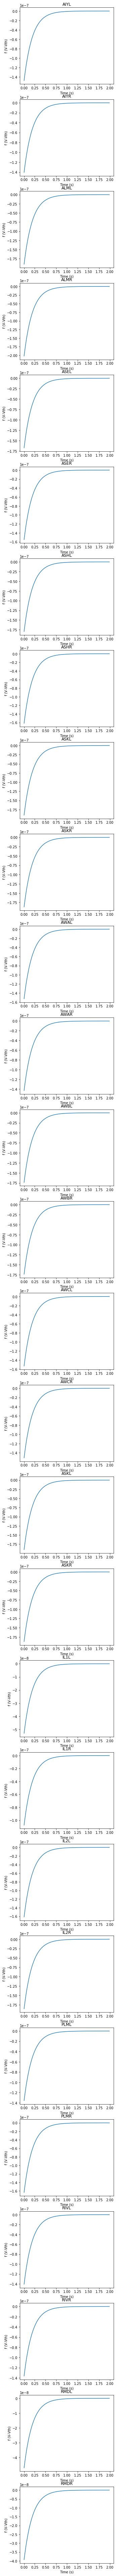

In [19]:
fig, axes = plt.subplots(nrows=len(neurons_to_observe), ncols=1, figsize=(5, 5*len(neurons_to_observe)))
plot_potentials(
  neuron_names_to_show = neurons_to_observe,
  dynamics = truncated_potentials,
  is_normalized_v = True,
  dt = model.dt,
  neuron_metadata_collection = neuron_metadata_collection,
  fig_axes = axes)

# Plot summarized dynamics per neuron class

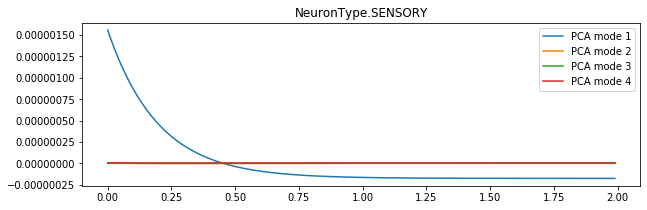

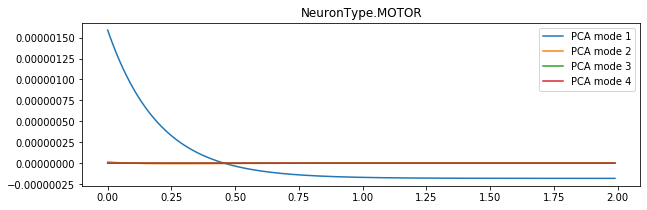

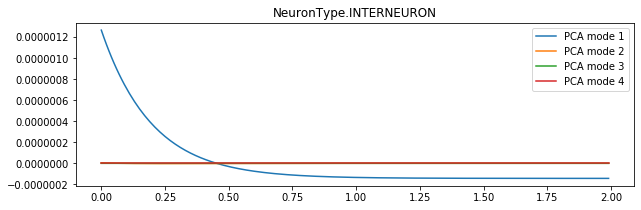

In [20]:
plot_pcas(truncated_potentials, model.dt, neuron_metadata_collection)